In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
from datetime import datetime
from datetime import timedelta
import matplotlib.cm as cm

In [138]:
path = Path.cwd()

In [139]:
def calc_NSE(Qo, Qm):
    QoAv  = np.mean(Qo)
    ErrUp = np.sum((Qo - Qm)**2)
    ErrDo = np.sum((Qo - QoAv)**2)
    return 1 - (ErrUp / ErrDo)
    
def calc_log_NSE(Qo, Qm):
    Qo[Qo == 0] = 1e-6
    QoAv  = np.mean(Qo)
    ErrUp = np.sum((np.log(Qo) - np.log(Qm))**2)
    ErrDo = np.sum((np.log(Qo) - np.log(QoAv))**2)
    return 1 - (ErrUp / ErrDo)

In [155]:
files = list((path / "Output").glob("*_N-500_2024-05-28 12*.nc"))

In [156]:
# for file in files:
#     ds = xr.open_dataset(file)
#     NSE = np.zeros(ds.attrs['n_particles'])
#     log_NSE = np.zeros(ds.attrs['n_particles'])
#     for i in range(ds.attrs['n_particles']):
#         NSE[i] = calc_NSE(ds["Q_obs"].values, ds["Q"].isel(EnsembleMember=i).values)
#         log_NSE[i] = calc_log_NSE(ds["Q_obs"].values, ds["Q"].isel(EnsembleMember=i).values)

#     i_max_nse = NSE.argmax()
#     i_max_log_nse = log_NSE.argmax()

#     ds = ds.isel(EnsembleMember=[i_max_nse, i_max_log_nse])
#     dict_nse = dict(NSE_max=NSE.max(),
#                     log_NSE_max=log_NSE.max(),
#                     i_NSE_max=i_max_nse,
#                     i_log_NSE_max=i_max_log_nse)
#     ds.attrs.update(dict_nse)
#     ds.to_netcdf(file.parent / (file.name.replace(" ", "_")))

In [157]:
files

[PosixPath('/media/davidhaasnoot/files/work/Studie TUD/Msc/Year 6/Q3 Thesis/Code/run_callibration/Output/01333000_N-500_2024-05-28 12_03.nc'),
 PosixPath('/media/davidhaasnoot/files/work/Studie TUD/Msc/Year 6/Q3 Thesis/Code/run_callibration/Output/01350000_N-500_2024-05-28 12_13.nc'),
 PosixPath('/media/davidhaasnoot/files/work/Studie TUD/Msc/Year 6/Q3 Thesis/Code/run_callibration/Output/01350080_N-500_2024-05-28 12_22.nc'),
 PosixPath('/media/davidhaasnoot/files/work/Studie TUD/Msc/Year 6/Q3 Thesis/Code/run_callibration/Output/01350140_N-500_2024-05-28 12_32.nc')]

In [158]:
file = files[-1]
ds = xr.open_dataset(file)

In [159]:
ds

<xarray.Dataset> Size: 208kB
Dimensions:         (EnsembleMember: 2, time: 1857)
Coordinates:
  * EnsembleMember  (EnsembleMember) int64 16B 343 421
  * time            (time) datetime64[ns] 15kB 1997-08-01 ... 2002-08-31
Data variables: (12/16)
    Si              (EnsembleMember, time) float64 30kB ...
    Su              (EnsembleMember, time) float64 30kB ...
    Sf              (EnsembleMember, time) float64 30kB ...
    Ss              (EnsembleMember, time) float64 30kB ...
    Sp              (EnsembleMember, time) float64 30kB ...
    Q               (EnsembleMember, time) float64 30kB ...
    ...              ...
    Pmax            (EnsembleMember) float64 16B ...
    Tlag            (EnsembleMember) float64 16B ...
    Kf              (EnsembleMember) float64 16B ...
    Ks              (EnsembleMember) float64 16B ...
    FM              (EnsembleMember) float64 16B ...
    Q_obs           (time) float64 15kB ...
Attributes:
    title:          HBV storage & parameter terms data over time for 500 part...
    history:        Storage term results from ewatercycle_HBV.model
    n_particles:    500
    HRU_id:         01350140
    NSE_max:        0.38354034403476767
    log_NSE_max:    0.7736818802363361
    i_NSE_max:      343
    i_log_NSE_max:  421

In [160]:
ds["Q"].values

array([[0.01846278, 0.01842033, 0.01837759, ..., 0.42466419, 0.6917881 ,
        0.64515287],
       [0.00282264, 0.01128809, 0.02397897, ..., 0.06849632, 0.07377625,
        0.08877393]])

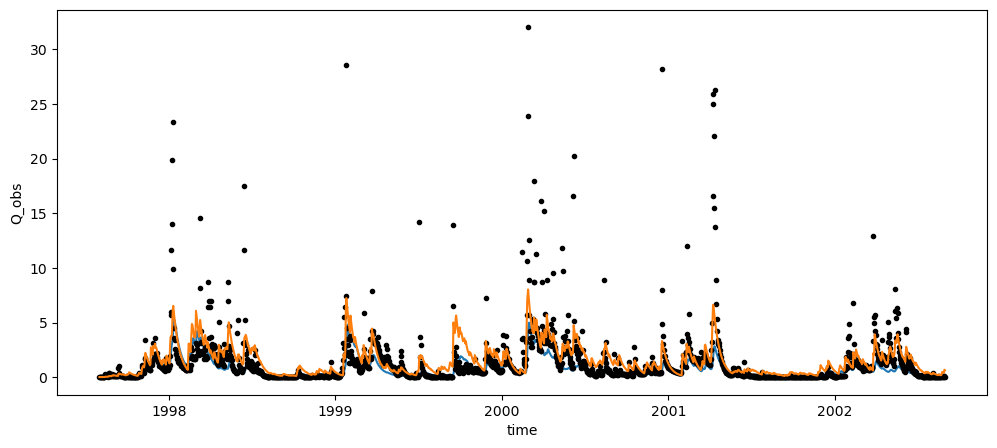

In [161]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
ax.plot(ds["Q"].time.values, ds["Q"].sel(EnsembleMember=ds.attrs['i_NSE_max']).values,color="C1", zorder=10,label='NSE')    
ax.plot(ds["Q"].time.values, ds["Q"].sel(EnsembleMember=ds.attrs['i_log_NSE_max']).values,color="C0")
ds["Q_obs"].plot(ax=ax,color='k',lw=0,marker='.')